In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import load_dts_data, create_burned_features, plot_temperature_with_features, plot_3night_mean_temperature


In [9]:
# Load the spatial features data
spatial_features = pd.read_csv('poi_spatial_features.csv')

# Split into POI features and regions
poi_features = spatial_features[spatial_features['feature_type'] == 'poi'].copy()
region_features = spatial_features[spatial_features['feature_type'] == 'region'].copy()

# Display the complete table
print(spatial_features.to_string(index=False))


feature_type feature_name  input_lat  input_lon  stream_distance_m  distance_start_m  distance_end_m       calculation_method                                                         notes
         poi      ditch_3  7544833.8   383605.2              630.0               NaN             NaN GPS_projection_to_stream    Field GPS coordinates projected onto stream network in GIS
         poi      ditch_2  7544752.9   383693.5              700.0               NaN             NaN GPS_projection_to_stream    Field GPS coordinates projected onto stream network in GIS
         poi      ditch_1  7544242.4   383812.0             1470.0               NaN             NaN GPS_projection_to_stream    Field GPS coordinates projected onto stream network in GIS
         poi       upland  7543888.6   383914.4             1890.0               NaN             NaN GPS_projection_to_stream    Field GPS coordinates projected onto stream network in GIS
      region      esker_1        NaN        NaN             

In [10]:
# Load DTS temperature data
# Update this path to point to your filtered DTS dataset
DTS_FILE = r"C:\Users\pparvizi24\OneDrive - University of Oulu and Oamk\Parsa-PHD-OneDrive\DTS\Dataset - All\Filtered.nc" # Relative path - adjust to your data location
dts_data, dts_x, temp_var = load_dts_data(DTS_FILE)


DTS loaded: 927 points from 60.6m to 1939.6m
Temperature variable: 'T'


In [11]:
# Extract distances for burning
poi_distances = {row['feature_name']: int(row['stream_distance_m']) 
                 for _, row in poi_features.iterrows()}

esker_regions = {row['feature_name']: (int(row['distance_start_m']), int(row['distance_end_m']))
                 for _, row in region_features.iterrows()}

print(f"Extracted {len(poi_distances)} POI features and {len(esker_regions)} regions")


Extracted 4 POI features and 2 regions


In [12]:
# Create burned feature vector (maps features to DTS positions)
burned_features = create_burned_features(
    dts_x=dts_x,
    correct_poi_distances=poi_distances,
    esker_regions=esker_regions,
    tolerance=25,
    output_file='dts_burned_features.csv',
    verbose=False  # Silent - just creates CSV
)

print(f"Created: dts_burned_features.csv ({len(burned_features)} points)")


Created: dts_burned_features.csv (927 points)


Adding burned stream features as background...

Plotting temperatures for 4 dates...
   2022-06-11: 4.42°C to 11.49°C
   2022-07-09: 4.48°C to 13.75°C
   2022-09-05: 4.52°C to 9.42°C
   2022-10-05: 4.53°C to 6.71°C


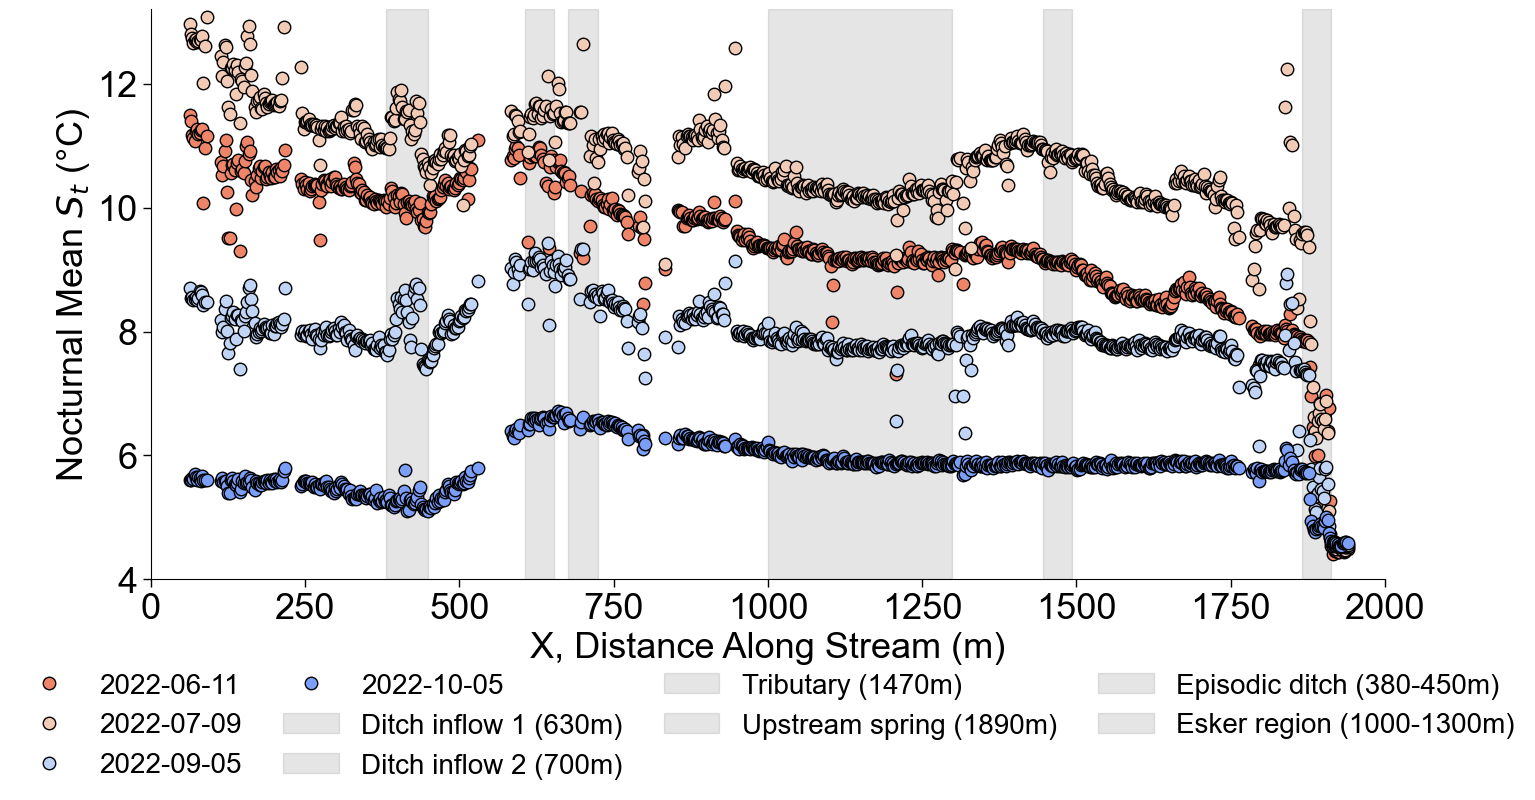

In [13]:

# Define dates to plot
dates = ['2022-06-11', '2022-07-09', '2022-09-05', '2022-10-05']

# Plot temperature with feature backgrounds
plot_temperature_with_features(
    dts_data=dts_data,
    dates=dates,
    start_hour=0,
    end_hour=3,
    burned_features_file='dts_burned_features.csv',
    xlim=(0, 2000),
    ylim=(4, 13.2),
    figsize=(14, 9),
    save_fp=None  # Set to filepath to save figure
)


Adding burned stream features as background...

Plotting 3-night mean temperatures for 4 periods...
   June 8-11: 4.46°C to 11.13°C
   July 9-12: 4.43°C to 14.26°C
   Sept 5-8: 4.52°C to 9.46°C
   Oct 3-5: 4.53°C to 6.59°C


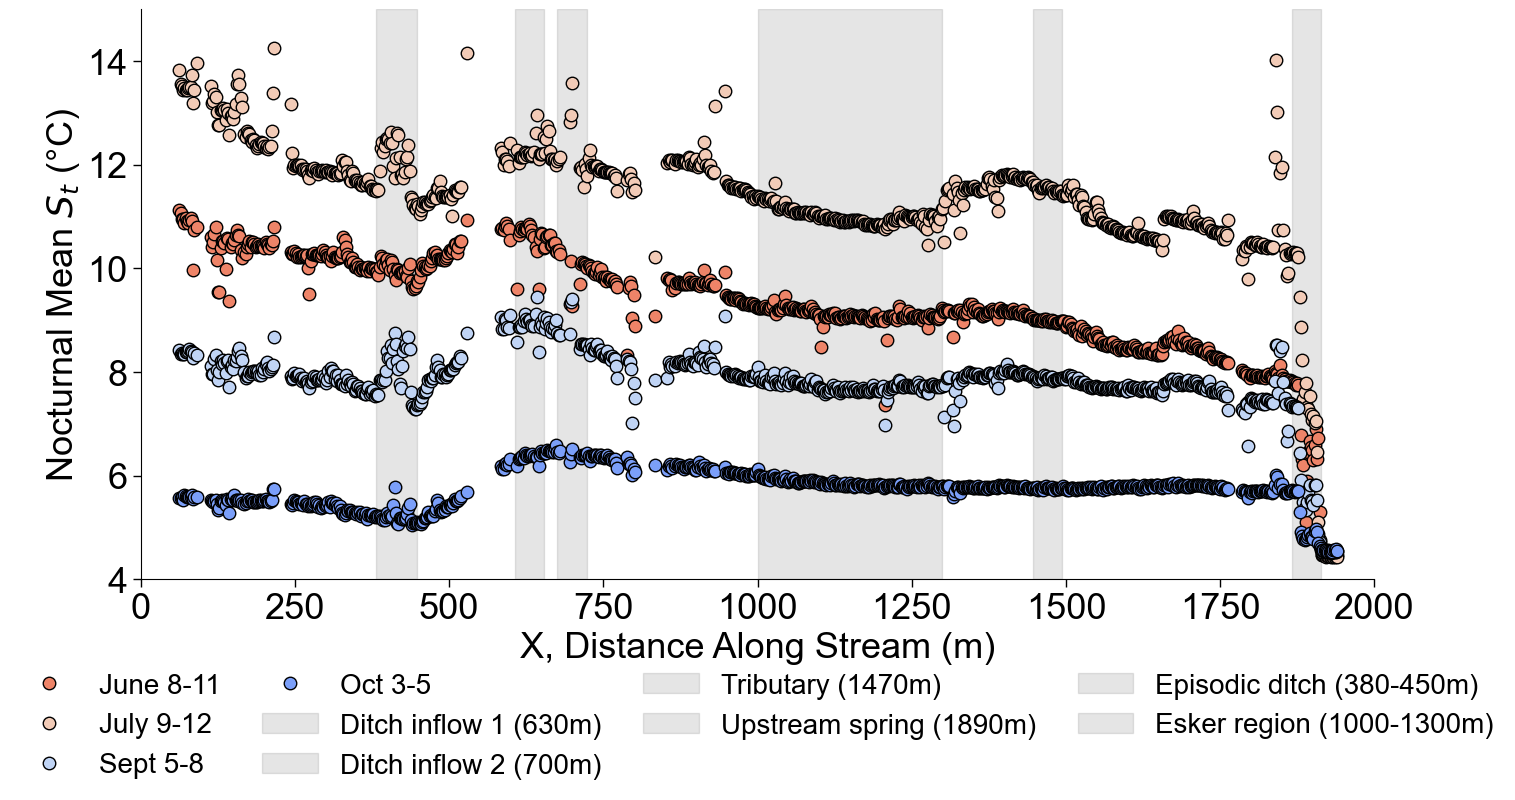

In [16]:
# Define 3-night periods to average
# Format: (start_date, end_date, label)
three_night_periods = [
    ('2022-06-09', '2022-06-11', 'June 8-11'),      # 3 nights in June
    ('2022-07-07', '2022-07-09', 'July 9-12'),       # 3 nights in July
    ('2022-09-03', '2022-09-05', 'Sept 5-8'),       # 3 nights in September
    ('2022-10-03', '2022-10-05', 'Oct 3-5'),        # 3 nights in October
]

# Plot 3-night mean stream temperatures
plot_3night_mean_temperature(
    dts_data=dts_data,
    three_night_periods=three_night_periods,
    start_hour=0,
    end_hour=3,
    burned_features_file='dts_burned_features.csv',
    xlim=(0, 2000),
    ylim=(4, 15),
    figsize=(14, 9),
    save_fp=None  # Set to filepath to save figure
)
